## PLANT SPECIES CLASSIFICATION USING LEAF IMAGES

#### Importing all the required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import cv2
import matplotlib.pyplot as plt
from warnings import filterwarnings

AttributeError: module 'tensorflow._api.v2.compat.v2.__internal__' has no attribute 'register_load_context_function'

### Data Collection

Collecting images from directory and exploring the data

In [2]:
#Define the directory path
data_dir="/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data"

In [3]:
#Convert the directory path to a pathlib.Path object
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data')

In [4]:
#Checking if the directory exists or not
data_dir.exists()

True

In [5]:
# List all image files 
list(data_dir.glob('*/*.jpg'))

[PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_13.ab.jpg'),
 PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_01.ab.jpg'),
 PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_03.ab.jpg'),
 PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_11.ab.jpg'),
 PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_15.ab.jpg'),
 PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_07.ab.jpg'),
 PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_05.ab.jpg'),
 PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_09.ab.jpg'),
 PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/

In [6]:
#top 5 image files
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_13.ab.jpg'),
 PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_01.ab.jpg'),
 PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_03.ab.jpg'),
 PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_11.ab.jpg'),
 PosixPath('/Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_15.ab.jpg')]

In [7]:
#count of images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1600


Total number of images present in our dataset is 1600

In [8]:
#Image count for species: Quercus_Castaneifolia
Quercus_Castaneifolia = list(data_dir.glob('Quercus_Castaneifolia/*'))
print(len(Quercus_Castaneifolia))

16


Total number of images present in species:Quercus_Castaneifolia is 16

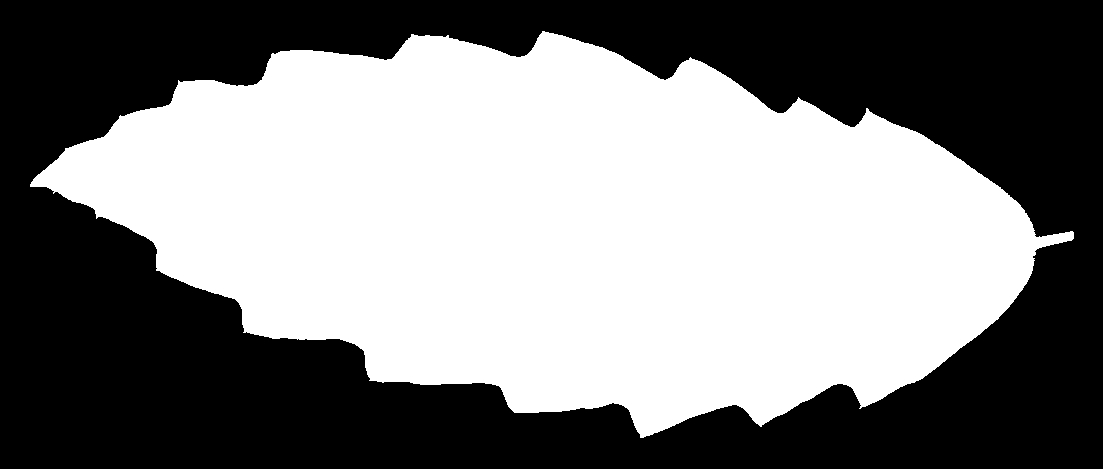

In [9]:
#Opening image using PIL
PIL.Image.open(str(Quercus_Castaneifolia[1]))

In [10]:
#extracts folder names within a specified directory path and counts them
import os
directory_path = '//Users/tejaswinianguluri/Documents/100_leaves_plant_species/data'
folder_names = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]
len(folder_names)

100

Total number of classes in our dataset is 100

In [11]:
#Creates a dictionary mapping plant species folder names to lists of Path objects representing leaf image paths within each folder.
from pathlib import Path
leaf_images_dict={}
for i in folder_names:
    folder_name=i
    folder_path = os.path.join(directory_path,folder_name)
    keys=i
    values=list(Path(folder_path).glob('*'))
    leaf_images_dict[keys]=values
leaf_images_dict

{'Ilex_Cornuta': [PosixPath('//Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_13.ab.jpg'),
  PosixPath('//Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_01.ab.jpg'),
  PosixPath('//Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_03.ab.jpg'),
  PosixPath('//Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_11.ab.jpg'),
  PosixPath('//Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_15.ab.jpg'),
  PosixPath('//Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_07.ab.jpg'),
  PosixPath('//Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_05.ab.jpg'),
  PosixPath('//Users/tejaswinianguluri/Documents/100_leaves_plant_species/data/Ilex_Cornuta/Ilex_Cornuta_09.ab.jpg'),
  PosixPath('//Users/tejaswinianguluri/D

In [12]:
# Construct a dictionary mapping plant species folder names to numerical labels, incrementally assigned.

leafs_labels_dict = {}
j=0
for i in folder_names:
    keys=i
    values=j
    leafs_labels_dict[keys]=values
    j=j+1
leafs_labels_dict

    

{'Ilex_Cornuta': 0,
 'Quercus_Castaneifolia': 1,
 'Quercus_Pyrenaica': 2,
 'Quercus_Ellipsoidalis': 3,
 'Viburnum_Tinus': 4,
 'Quercus_Trojana': 5,
 'Populus_Adenopoda': 6,
 'Quercus_Vulcanica': 7,
 'Quercus_Afares': 8,
 'Viburnum_x_Rhytidophylloides': 9,
 'Cornus_Macrophylla': 10,
 'Quercus_Texana': 11,
 'Morus_Nigra': 12,
 'Quercus_Cerris': 13,
 'Arundinaria_Simonii': 14,
 'Betula_Pendula': 15,
 'Quercus_Hartwissiana': 16,
 'Magnolia_Heptapeta': 17,
 'Acer_Pictum': 18,
 'Quercus_Suber': 19,
 'Quercus_Infectoria_sub': 20,
 'Quercus_Variabilis': 21,
 'Quercus_Brantii': 22,
 'Eucalyptus_Urnigera': 23,
 'Quercus_Greggii': 24,
 'Alnus_Maximowiczii': 25,
 'Quercus_Imbricaria': 26,
 'Eucalyptus_Neglecta': 27,
 'Acer_Palmatum': 28,
 'Liriodendron_Tulipifera': 29,
 'Quercus_Crassipes': 30,
 'Quercus_Crassifolia': 31,
 'Tilia_Oliveri': 32,
 'Cytisus_Battandieri': 33,
 'Eucalyptus_Glaucescens': 34,
 'Acer_Platanoids': 35,
 'Pterocarya_Stenoptera': 36,
 'Acer_Saccharinum': 37,
 'Prunus_Avium': 3

Labels for classes

In [13]:
# Print the label and the number of images associated 

for label, images in leaf_images_dict.items():
    print(f"Label: {label}, Number of images: {len(images)}")

Label: Ilex_Cornuta, Number of images: 16
Label: Quercus_Castaneifolia, Number of images: 16
Label: Quercus_Pyrenaica, Number of images: 16
Label: Quercus_Ellipsoidalis, Number of images: 16
Label: Viburnum_Tinus, Number of images: 16
Label: Quercus_Trojana, Number of images: 16
Label: Populus_Adenopoda, Number of images: 16
Label: Quercus_Vulcanica, Number of images: 16
Label: Quercus_Afares, Number of images: 16
Label: Viburnum_x_Rhytidophylloides, Number of images: 16
Label: Cornus_Macrophylla, Number of images: 16
Label: Quercus_Texana, Number of images: 16
Label: Morus_Nigra, Number of images: 16
Label: Quercus_Cerris, Number of images: 16
Label: Arundinaria_Simonii, Number of images: 16
Label: Betula_Pendula, Number of images: 16
Label: Quercus_Hartwissiana, Number of images: 16
Label: Magnolia_Heptapeta, Number of images: 16
Label: Acer_Pictum, Number of images: 16
Label: Quercus_Suber, Number of images: 16
Label: Quercus_Infectoria_sub, Number of images: 16
Label: Quercus_Varia

balanced dataset and has 16 images for each label

In [14]:
# Read a grayscale image using OpenCV

img = cv2.imread(str(leaf_images_dict['Alnus_Viridis'][2]),cv2.IMREAD_GRAYSCALE)
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

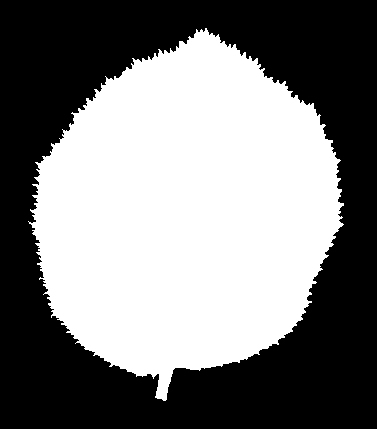

In [15]:
#Opening image using PIL
PIL.Image.open(str(leaf_images_dict['Alnus_Viridis'][2]))

### Image Preprocessing

Resizing and Converting Images to RGB Format

In [16]:
#Shape of the image
img.shape

(429, 377)

In [19]:
# Resize the grayscale image to dimensions (224, 224) using OpenCV
resized_img = cv2.resize(img,(224,224)).shape

In [20]:
X, y = [], []

for Leaf_name, images in leaf_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (224, 224))  # Resize images 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        X.append(img)
        y.append(leafs_labels_dict[Leaf_name])

Displaying sample images for different labels

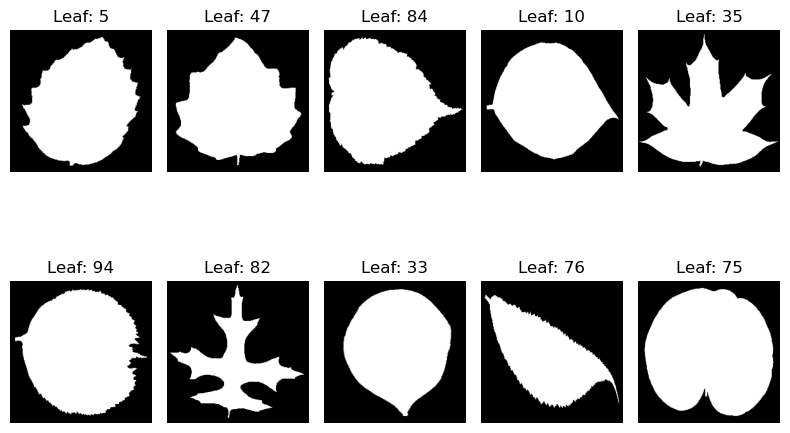

In [21]:
import matplotlib.pyplot as plt
import random

# Initialize lists to store images and labels
X, y = [], []

# labels
label_colors = {
    'Acer_Campestre': (255, 0, 0), 
    'Acer_Palmatum': (0, 255, 0),   
    'Alnus_Viridis': (0, 0, 255),    
    'Quercus_Afares': (255, 255, 0),  
    'Fagus_Sylvatica': (255, 0, 255), 
    'Quercus_Crassipes':(255, 0, 0) ,
    'Quercus_Dolicholepis':(0, 255, 0),
    'Quercus_Ellipsoidalis':(0, 0, 255) ,
    'Quercus_Greggii':(255, 255, 0),
    'Quercus_Hartwissiana':(255, 0, 255),
    

}

for Leaf_name, images in leaf_images_dict.items():
    for image_path in images:
        # Reading the image using OpenCV
        img = cv2.imread(str(image_path))
        # Resize images 
        img = cv2.resize(img, (224, 224))
        # Convert to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Append image and label to lists
        X.append(img)
        y.append(leafs_labels_dict[Leaf_name])


combined = list(zip(X, y))
random.shuffle(combined)
X[:], y[:] = zip(*combined)

# Creating a grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(8, 6))

# Flatten the axes array
axes = axes.flatten()


for i in range(10):
    # random index
    idx = random.randint(0, len(X) - 1)
    # image and label
    img = X[idx]
    label = y[idx]
    label_color = label_colors.get(label, (0, 0, 0)) 
    # Plot the image
    axes[i].imshow(img)
    axes[i].set_title('Leaf: ' + str(label))
    axes[i].set_xlabel('Color: {}'.format(label_color))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Displaying different images for species: Ilex_Cornuta

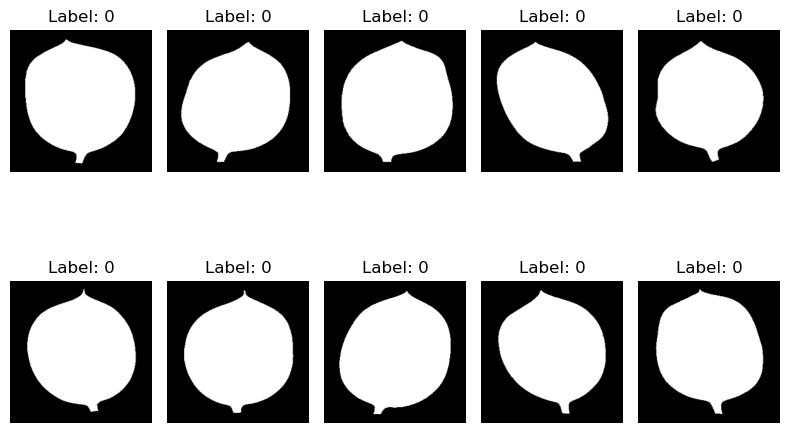

In [22]:
#lists to store images and labels
X, y = [], []

# Loop through the leaf_images_dict
for Leaf_name, images in leaf_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (224, 224))  # Resize images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        X.append(img)
        y.append(leafs_labels_dict[Leaf_name])

# Create a grid of subplots
num_images = min(len(X), 10)
fig, axes = plt.subplots(2, 5, figsize=(8,6 ))

# Flatten the axes array
axes = axes.flatten()

# Plot the images
for i in range(num_images):
    axes[i].imshow(X[i])
    axes[i].set_title('Label: {}'.format(y[i]))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Conversion of data to numpy array

In [23]:
# Converting image list and label list to numpy array 
X = np.array(X)
y = np.array(y)

In [24]:
X[0].shape #shape of X

(224, 224, 3)

Spliting of data

In [25]:
#Splitting of data in testing, validation and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.15, random_state=42)

In [26]:
X_train[0].shape

(224, 224, 3)

In [27]:
X_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [28]:
#Scaling the pixel values in the range of [0,1]
X_train_scaled = X_train / 255
X_val_scaled = X_val / 255
X_test_scaled = X_test / 255

In [29]:
#length of the training, test and validation data
print(f"{len(X_train_scaled)}  {len(X_test_scaled)} {len(X_val_scaled)} ")

1156  240 204 


### Model Selection and Evaluation

Using pretrained models and transfer learning

### Inception_v3

In [30]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.regularizers import l2
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#base model as a first layer and added dropout layer to prevent overfitting
base_model.trainable = False 
model_inc = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(100, activation='softmax',kernel_regularizer=l2(0.002))  
])


model_inc.compile(optimizer=tf.keras.optimizers.Adam(),  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# summary of the model architecture
model_inc.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [31]:
# Training the model
history = model_inc.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val))

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 667ms/step - accuracy: 0.0560 - loss: 5.3364 - val_accuracy: 0.5343 - val_loss: 2.6185
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 671ms/step - accuracy: 0.5489 - loss: 2.3774 - val_accuracy: 0.7157 - val_loss: 1.7370
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 699ms/step - accuracy: 0.7326 - loss: 1.5967 - val_accuracy: 0.7892 - val_loss: 1.4003
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 737ms/step - accuracy: 0.7995 - loss: 1.2916 - val_accuracy: 0.7892 - val_loss: 1.3271
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 721ms/step - accuracy: 0.8652 - loss: 1.1050 - val_accuracy: 0.8235 - val_loss: 1.1931
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 724ms/step - accuracy: 0.9126 - loss: 0.9637 - val_accuracy: 0.8578 - val_loss: 1.1085
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 721ms/step - accuracy: 0.9217 - loss: 0.8953 - val_accuracy: 0.8627 - val_loss: 1.0662
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 705ms/step - accuracy: 0.9216 - loss: 0.8534 - val_accu

plots for comparision of training and validation accuracy and loss

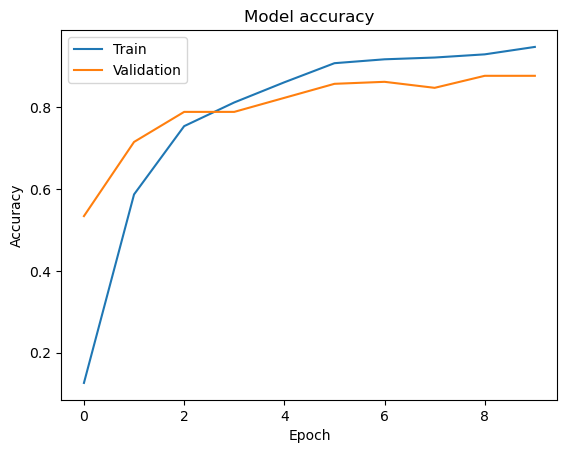

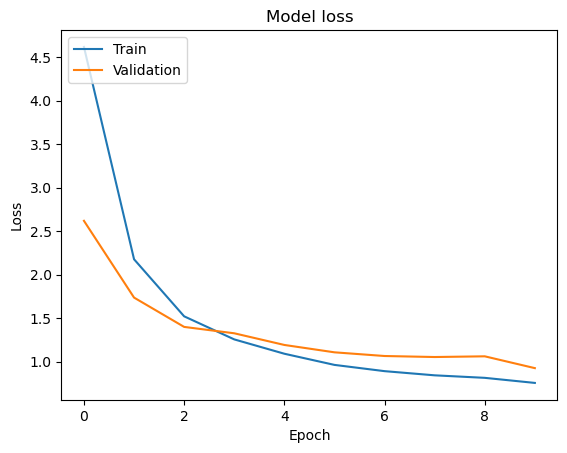

In [32]:
# Plots for training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plots training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Training accuracy quickly improves and levels off near 0.9, indicating good learning on the training data. Validation accuracy, while improving, plateaus around 0.7, suggesting some overfitting.

performnace metrics

In [33]:
# Evaluating the model using test set
y_pred = model_inc.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print("Precision:", precision)

# Calculating recall
recall = recall_score(y_test, y_pred_classes, average='weighted')
print("Recall:", recall)

# Calculating F1 score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print("F1 Score:", f1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 679ms/step
Accuracy: 0.8583333333333333
Precision: 0.8878869047619048
Recall: 0.8583333333333333
F1 Score: 0.8490160765160765


/Users/tejaswinianguluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswinianguluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion matrix

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 496ms/step


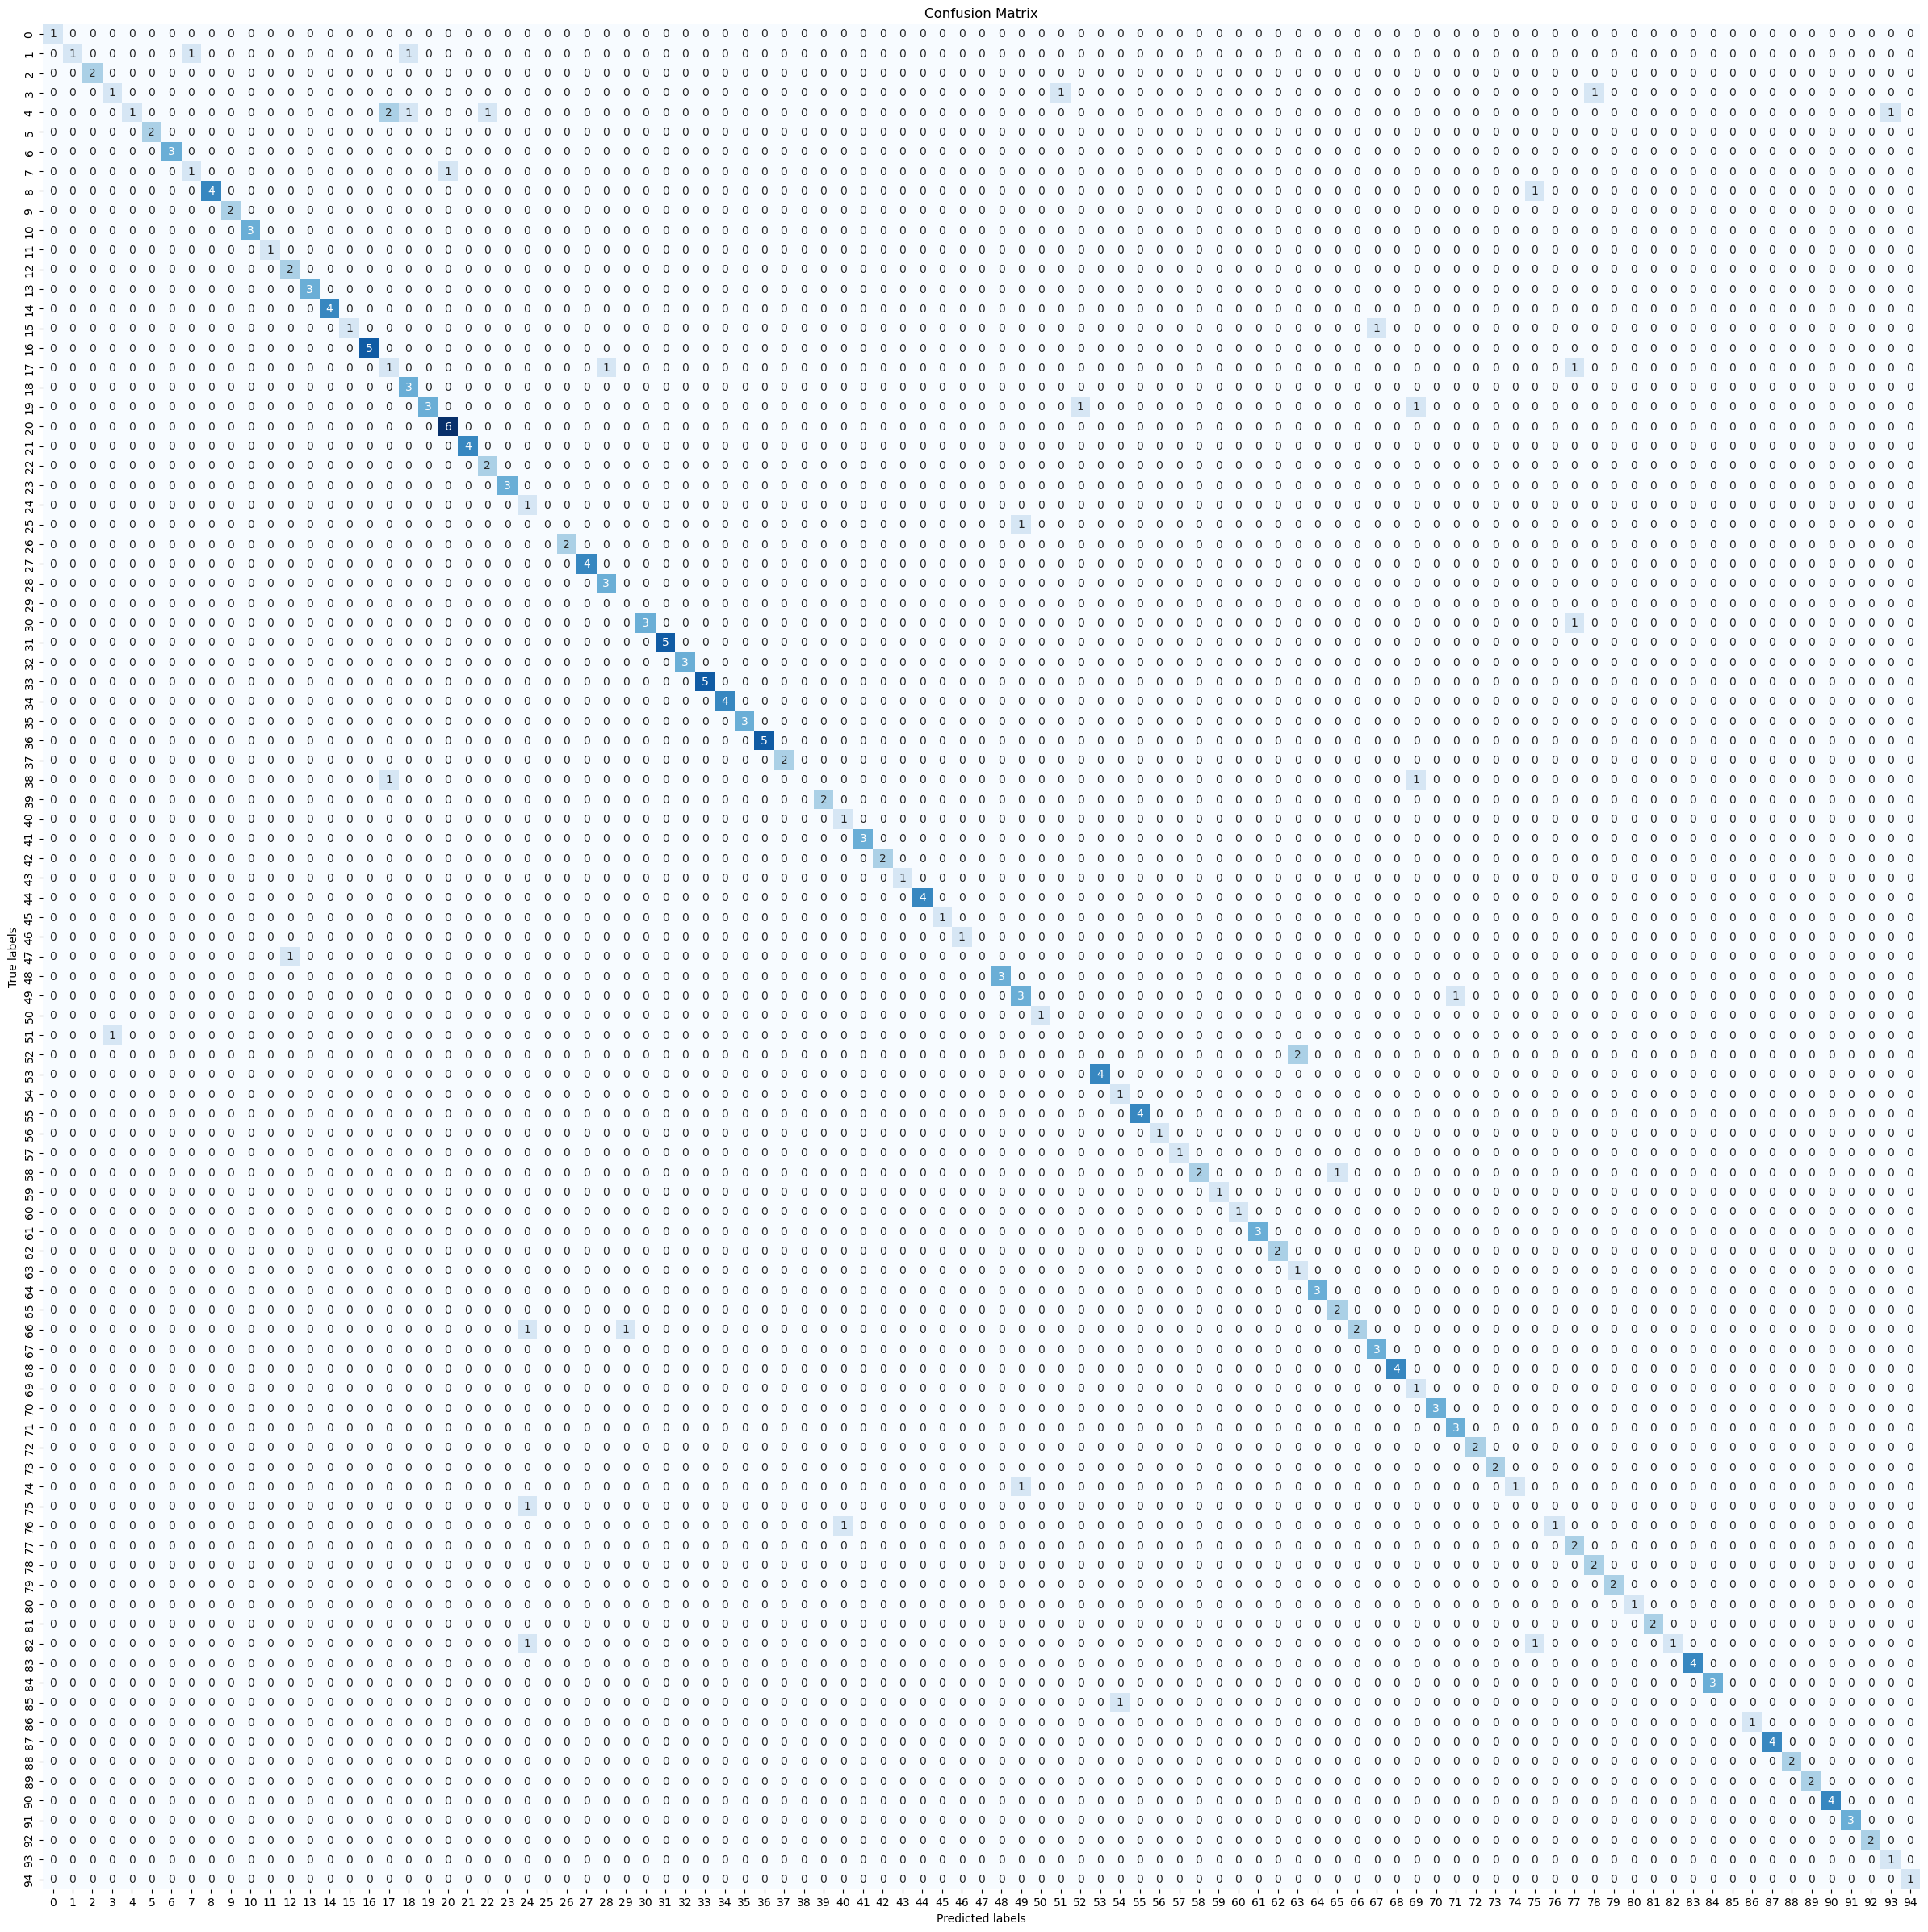

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# predictions for the test set
y_pred = model_inc.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot for confusion matrix
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

For a complex model like InceptionV3, high training accuracy (95%) suggests the model is learning the training data well and Lower test accuracy (85%) indicates the model might be memorizing specifics instead of learning general features, indicating the model is overfitting.


### MobileNet V1

In [46]:
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

#base model as first layer and added dropout layer
model1 = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(folder_names), activation='softmax'),
])

model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#summary of the model
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [47]:
# Training the model
history = model1.fit(X_train_scaled, y_train, epochs=8, validation_data=(X_val_scaled, y_val))

Epoch 1/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - accuracy: 0.0568 - loss: 4.8521 - val_accuracy: 0.4902 - val_loss: 2.4537
Epoch 2/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - accuracy: 0.3835 - loss: 2.3687 - val_accuracy: 0.6863 - val_loss: 1.4819
Epoch 3/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 226ms/step - accuracy: 0.6363 - loss: 1.5252 - val_accuracy: 0.8382 - val_loss: 1.0250
Epoch 4/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - accuracy: 0.7294 - loss: 1.1157 - val_accuracy: 0.8235 - val_loss: 0.8261
Epoch 5/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - accuracy: 0.8159 - loss: 0.8382 - val_accuracy: 0.8725 - val_loss: 0.6727
Epoch 6/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - accuracy: 0.8598 - loss: 0.6990 - val_accuracy: 0.9069 - val_loss: 0.5753
Epoch 7/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - accuracy: 0.8991 - loss: 0.5522 - val_accuracy: 0.9020 - val_loss: 0.5346
Epoch 8/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - accuracy: 0.8870 - loss: 0.4937 - val_accuracy: 0.9069 - v

Plots for comparision of Validation and training accuracy and loss values

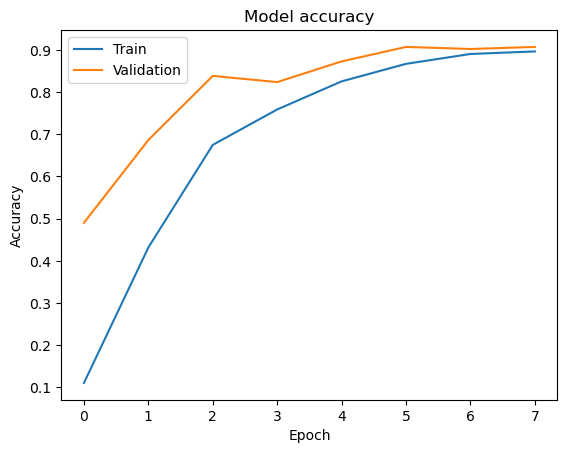

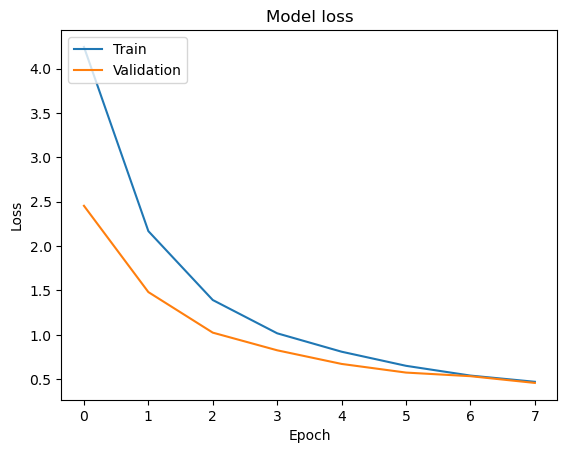

In [48]:
# Plots for training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plots for training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Training accuracy increases swiftly and plateaus near 0.9, indicating a strong fit to the training data. Validation accuracy also rises but plateaus at a lower level, approximately 0.8, which could indicate the model's good generalization ability. Both accuracies level off, suggesting the model has reached its learning capacity given the current configuration and data.

Performance metrics

In [49]:
# Evaluating the model on the test set
y_pred = model1.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print("Precision:", precision)

# Calculating recall
recall = recall_score(y_test, y_pred_classes, average='weighted')
print("Recall:", recall)

# Calculating F1 score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print("F1 Score:", f1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step
Accuracy: 0.9083333333333333
Precision: 0.9325694444444445
Recall: 0.9083333333333333
F1 Score: 0.9044435425685425


/Users/tejaswinianguluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step


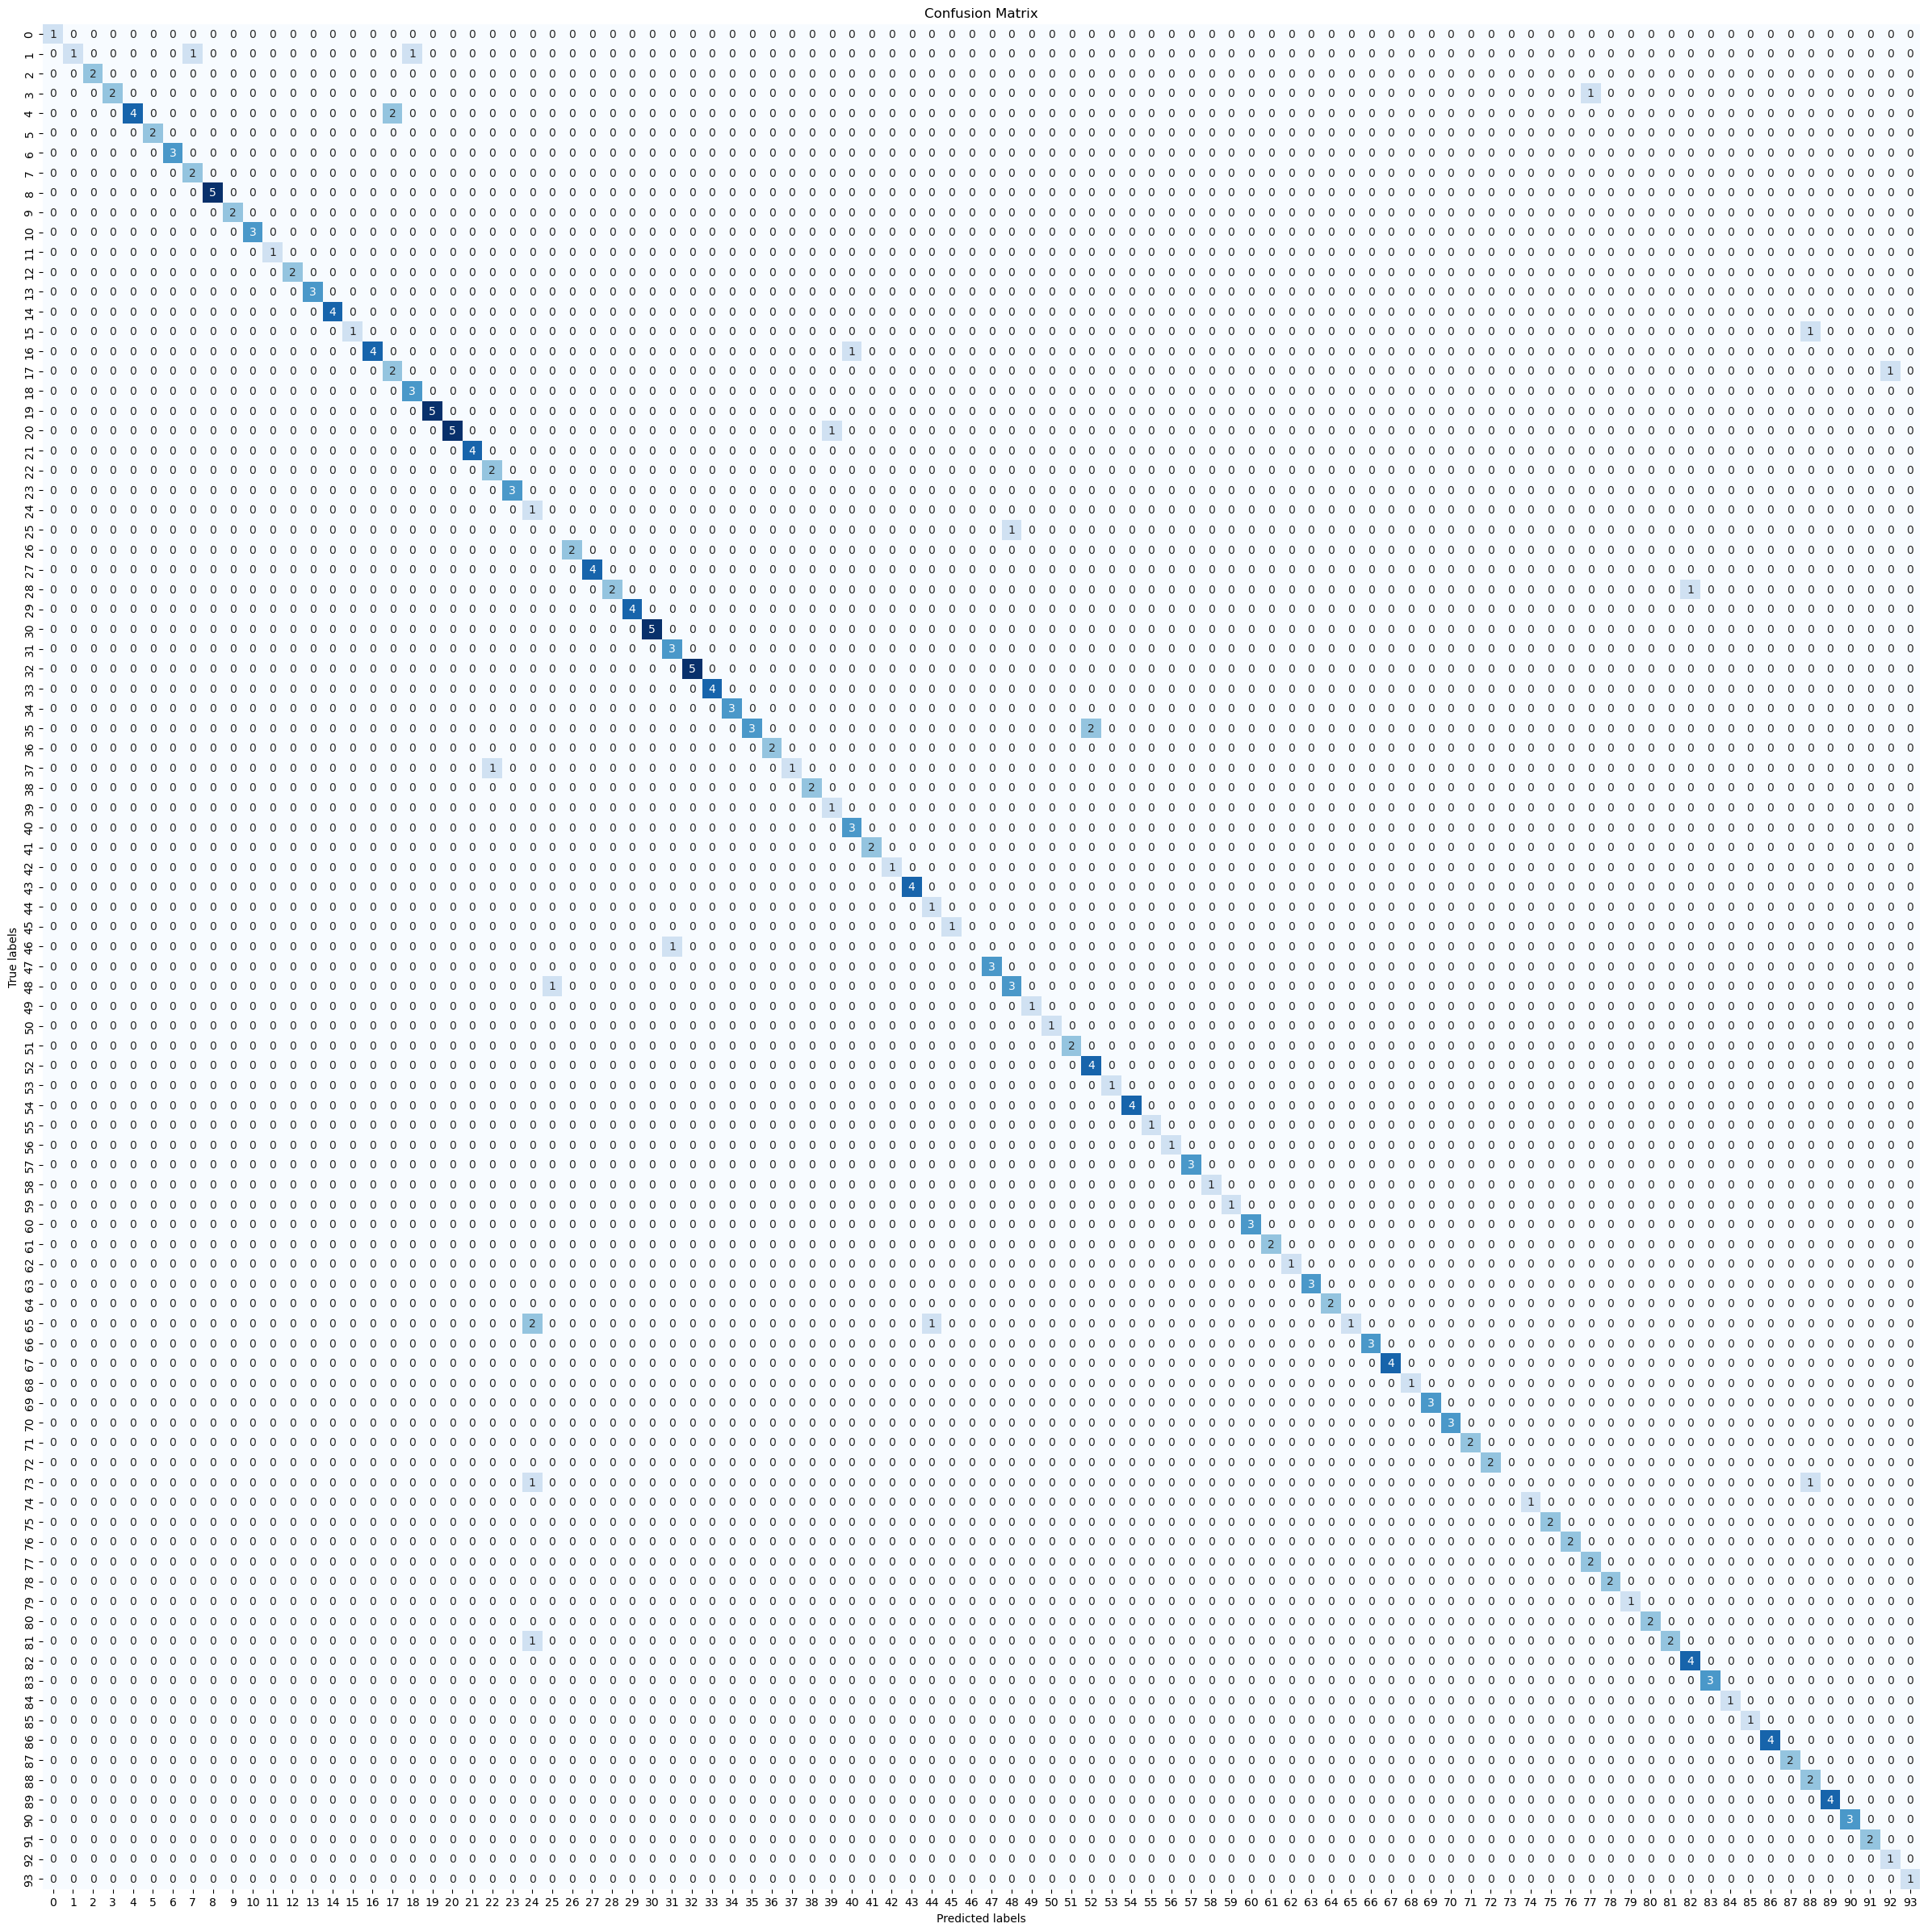

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# model predictions
y_pred = model1.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plots for confusion matrix
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

MobileNetV1 model achieved a training accuracy of 88% and a test accuracy of 91%, indicating good generalization to unseen data. It offers a balance between accuracy and computational efficiency.

### MobileNet V2

In [71]:
from tensorflow.keras.regularizers import l2
# Loading MobileNetV2 with pretrained weights
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the base model
base_model.trainable = False

# custom head for classification
model = Sequential([
    base_model,
    layers.Dropout(0.4),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(folder_names), activation='softmax'),
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# summary of the model architecture
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_13     │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [72]:
# Training the model
history = model.fit(X_train_scaled, y_train, epochs=6, validation_data=(X_val_scaled, y_val))

Epoch 1/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - accuracy: 0.0566 - loss: 4.8220 - val_accuracy: 0.4216 - val_loss: 2.4323
Epoch 2/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - accuracy: 0.4080 - loss: 2.2836 - val_accuracy: 0.6765 - val_loss: 1.5067
Epoch 3/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - accuracy: 0.6495 - loss: 1.4405 - val_accuracy: 0.7941 - val_loss: 1.0427
Epoch 4/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - accuracy: 0.7698 - loss: 0.9840 - val_accuracy: 0.8529 - val_loss: 0.8110
Epoch 5/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step - accuracy: 0.8330 - loss: 0.7543 - val_accuracy: 0.8578 - val_loss: 0.6994
Epoch 6/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 237ms/step - accuracy: 0.8753 - loss: 0.6350 - val_accuracy: 0.8922 - val_loss: 0.5959


In [73]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", test_acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.8491 - loss: 0.7022
Test accuracy: 0.8666666746139526


Hyper parameters tuning for dropout layers

In [74]:
def build_model(hp):
    base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

    # Freeze the base model
    base_model.trainable = False

    # first layer as basemodel and added drop out layers to prevent overfitting
    model = Sequential([
        base_model,
        layers.Dropout(hp.Float('dropout_1', min_value=0.3, max_value=0.5, step=0.1)),
        layers.GlobalAveragePooling2D(),
        layers.Dropout(hp.Float('dropout_2', min_value=0.3, max_value=0.5, step=0.1)),
        layers.Dense(len(folder_names), activation='softmax'),
    ])

    # Compiling the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model





In [75]:
#tuner for hyperparameter tuning
import kerastuner as kt
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=16,
                     factor=3,
                     directory='my_dir1',
                     project_name='hyperparameter_tuning1')

# searching the best hyper parameters
tuner.search(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val))

Reloading Tuner from my_dir1/hyperparameter_tuning1/tuner0.json


In [76]:
#summary for the model
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 7, 7, 1280)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_13     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │       128,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,642,286 (10.08 MB)

 Trainable params: 128,100 (500.39 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 256,202 (1000.79 KB)

In [77]:
#best hyper parameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps

In [78]:
# Rebuilding the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Training the model with the best hyperparameters
history = model.fit(X_train_scaled, y_train, epochs=12, validation_data=(X_val_scaled, y_val))


Epoch 1/12
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.0423 - loss: 5.2872 - val_accuracy: 0.4608 - val_loss: 2.6114
Epoch 2/12
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.2787 - loss: 2.8353 - val_accuracy: 0.6716 - val_loss: 1.5822
Epoch 3/12
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 237ms/step - accuracy: 0.4805 - loss: 1.8768 - val_accuracy: 0.8137 - val_loss: 1.1637
Epoch 4/12
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.5898 - loss: 1.4372 - val_accuracy: 0.8529 - val_loss: 0.9067
Epoch 5/12
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - accuracy: 0.6940 - loss: 1.1076 - val_accuracy: 0.8578 - val_loss: 0.7891
Epoch 6/12
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.7390 - loss: 0.9318 - val_accuracy: 0.8922 - val_loss: 0.6765
Epoch 7/12
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.7666 - loss: 0.8114 - val_accuracy: 0.9020 - val_loss: 0.5861
Epoch 8/12
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 239ms/step - accuracy: 0.8149 - loss: 0.7009 - val_accuracy: 0

visualising filters for one layer

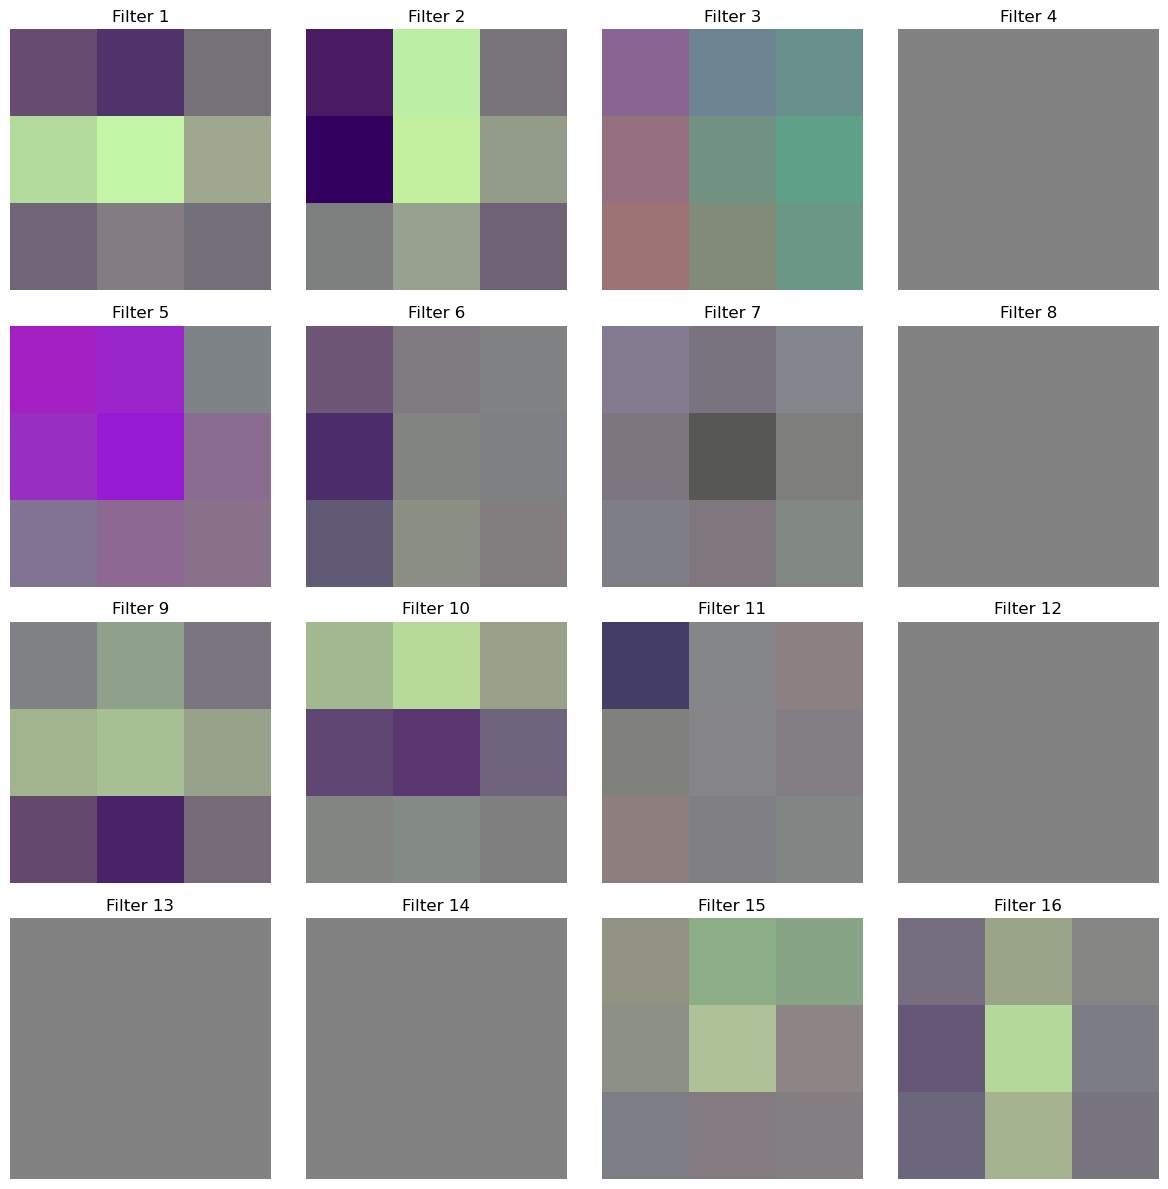

In [79]:
def visualize_filters(model, layer_index, num_filters=16):
    # weights of the specified convolutional layer
    layer_weights = model.layers[layer_index].get_weights()[0]
    
    # weights for visualization
    min_val = np.min(layer_weights)
    max_val = np.max(layer_weights)
    layer_weights = (layer_weights - min_val) / (max_val - min_val)
    
    # Plots for the filters
    nrows = int(np.ceil(num_filters / 4))
    fig, axes = plt.subplots(nrows, 4, figsize=(12, 3 * nrows))
    for i in range(num_filters):
        row = i // 4
        col = i % 4
        if nrows > 1:
            ax = axes[row, col]
        else:
            ax = axes[col]
        ax.imshow(layer_weights[:, :, :, i])
        ax.axis('off')
        ax.set_title(f'Filter {i+1}')
    plt.tight_layout()
    plt.show()

layer_index = 0  

# Visualizing the filters learned 
visualize_filters(model, layer_index)




Plots for comparision of validation and training accuracy and loss

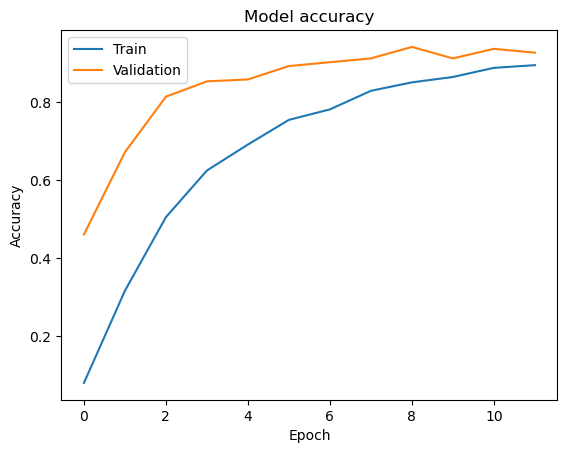

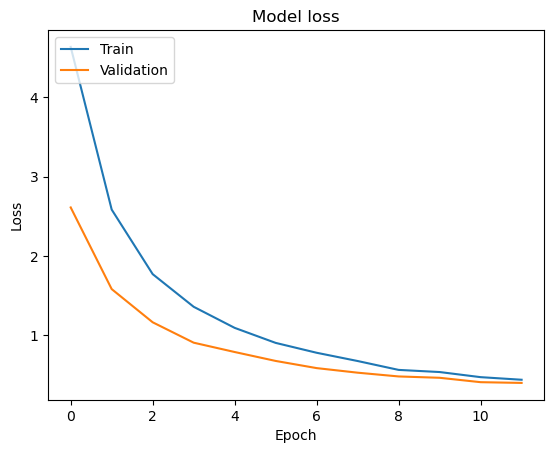

In [80]:
import matplotlib.pyplot as plt

# Plots for training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plots for training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


MobileNetV2 model achieved a training accuracy of 87% and a test accuracy of 92%, indicating good generalization to unseen data. It offers a balance between accuracy and computational efficiency.

Performance metrics

In [86]:
# Evaluating the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print("Precision:", precision)

# Calculating recall
recall = recall_score(y_test, y_pred_classes, average='weighted')
print("Recall:", recall)

# Calculating F1 score
f1 = f1_score(y_test, y_pred_classes, average='weighted')

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step
Accuracy: 0.9125
Precision: 0.9529166666666666
Recall: 0.9125


/Users/tejaswinianguluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswinianguluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step


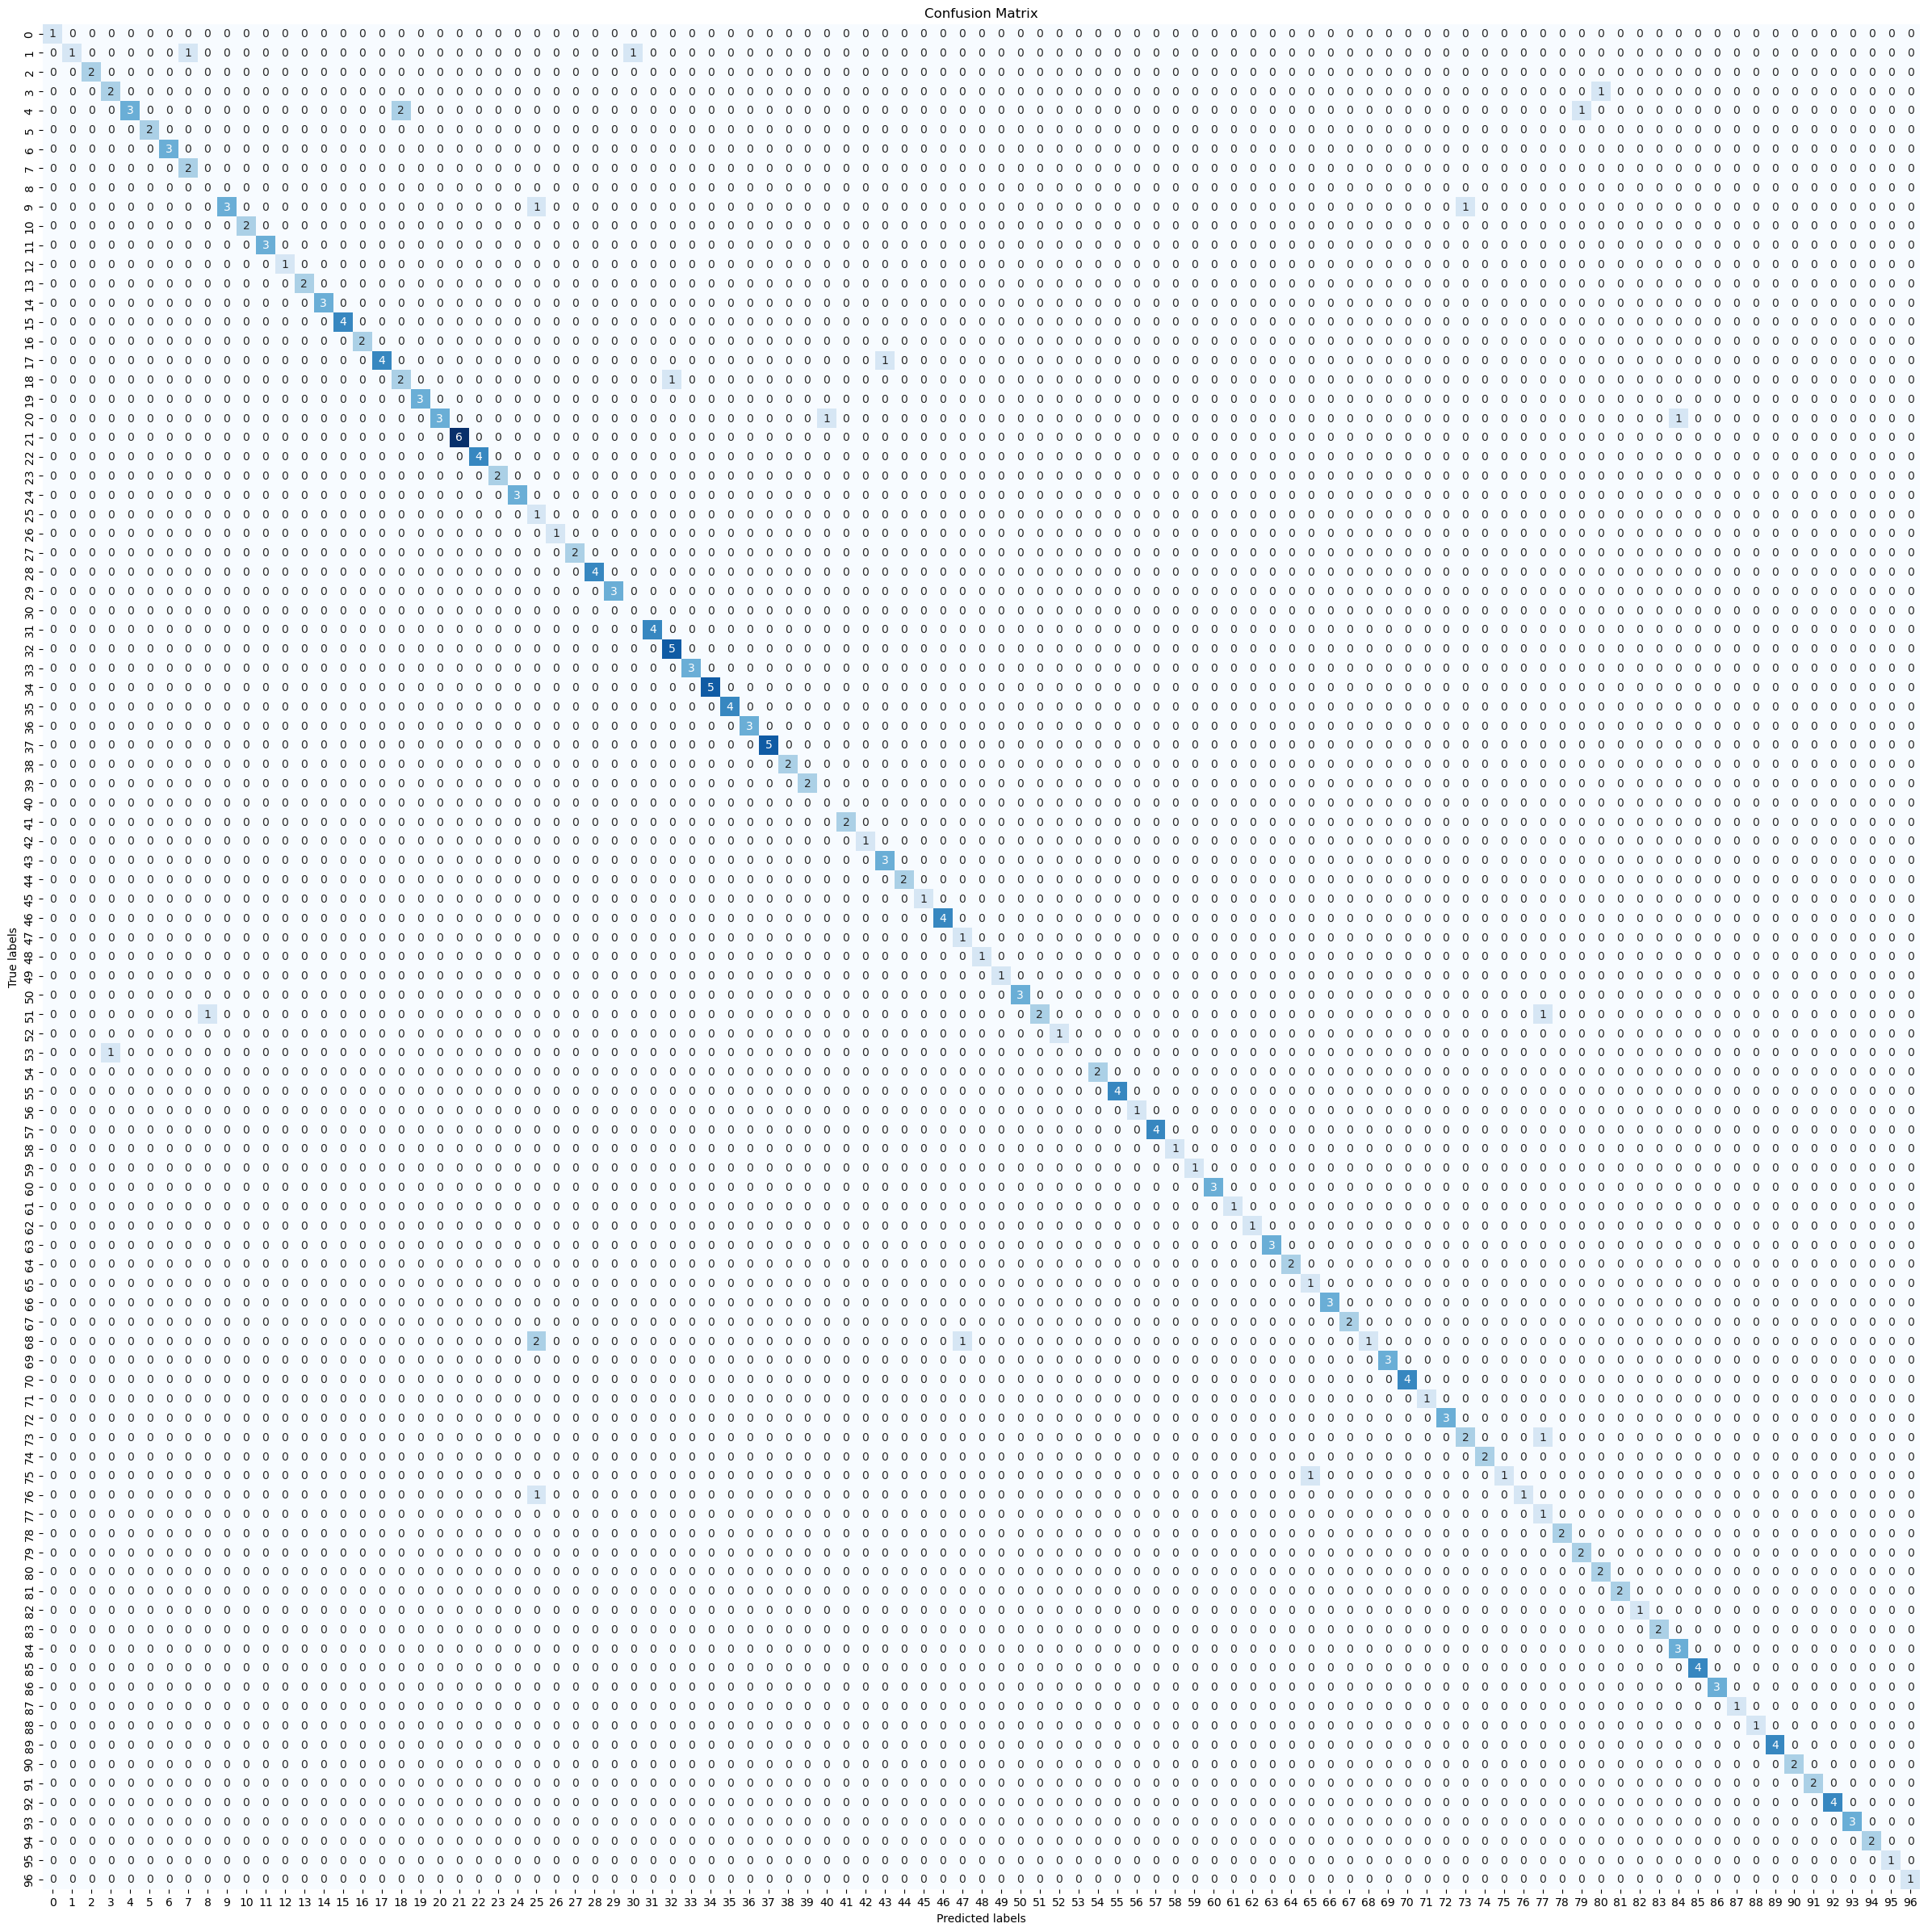

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# model predictions for the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plots for confusion matrix
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


After hyperparameter tuning, MobileNetV2 initially achieved a training accuracy of 87% and a test accuracy of 86%. Subsequently, with refined parameters, the model's training accuracy remained at 87%, while its test accuracy increased  to 91%. This improvement shows the importance of parameter optimization in enhancing the model's  performance. 

### ResNet 50

In [104]:
#base model as first layer and added drop out layer 
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(len(folder_names), activation='softmax'),
])
#compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#summary of the model
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_19     │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [105]:
#fitting the model
history = model.fit(X_train_scaled, y_train, epochs=8, validation_data=(X_val_scaled, y_val))

Epoch 1/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.0473 - loss: 5.6174 - val_accuracy: 0.1618 - val_loss: 3.4672
Epoch 2/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.2617 - loss: 3.1866 - val_accuracy: 0.4020 - val_loss: 2.6270
Epoch 3/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.3906 - loss: 2.4394 - val_accuracy: 0.5637 - val_loss: 1.8885
Epoch 4/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5765 - loss: 1.7101 - val_accuracy: 0.5784 - val_loss: 1.8408
Epoch 5/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5674 - loss: 1.6093 - val_accuracy: 0.6324 - val_loss: 1.2995
Epoch 6/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6814 - loss: 1.2186 - val_accuracy: 0.6961 - val_loss: 1.2463
Epoch 7/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7031 - loss: 1.1596 - val_accuracy: 0.6471 - val_loss: 1.1928
Epoch 8/8
37/37 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7470 - loss: 1.0047 - val_accuracy: 0.6912 - val_loss: 1.0730


Plots for comparing training and validation accuracies and losses

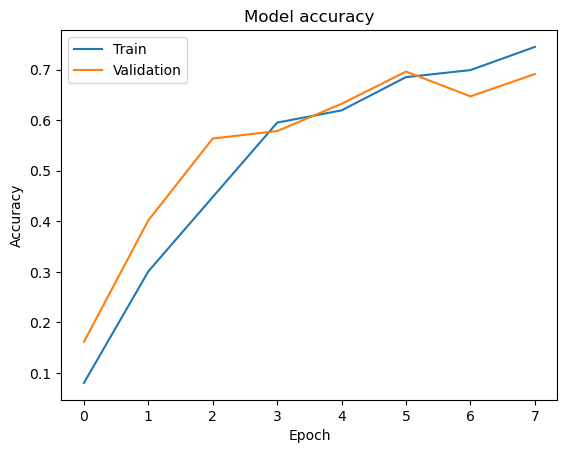

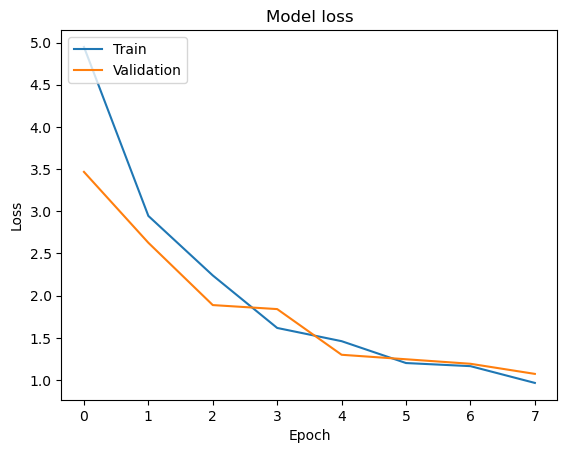

In [109]:
import matplotlib.pyplot as plt

# Plots for training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plots for training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

There's a notable convergence of training and validation accuracy after an initial gap, indicating effective learning without significant overfitting. However, the slight dip in validation accuracy near the end suggests the need to watch for overfitting as training progresses further. Overall, the model is learning, but adjustments may be required to maintain validation performance.

Performance metrics

In [110]:
# Evaluating the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print("Precision:", precision)

# Calculating recall
recall = recall_score(y_test, y_pred_classes, average='weighted')
print("Recall:", recall)

# Calculating F1 score
f1 = f1_score(y_test, y_pred_classes, average='weighted')

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 842ms/step
Accuracy: 0.6583333333333333
Precision: 0.7150419372294372
Recall: 0.6583333333333333


/Users/tejaswinianguluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswinianguluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 951ms/step


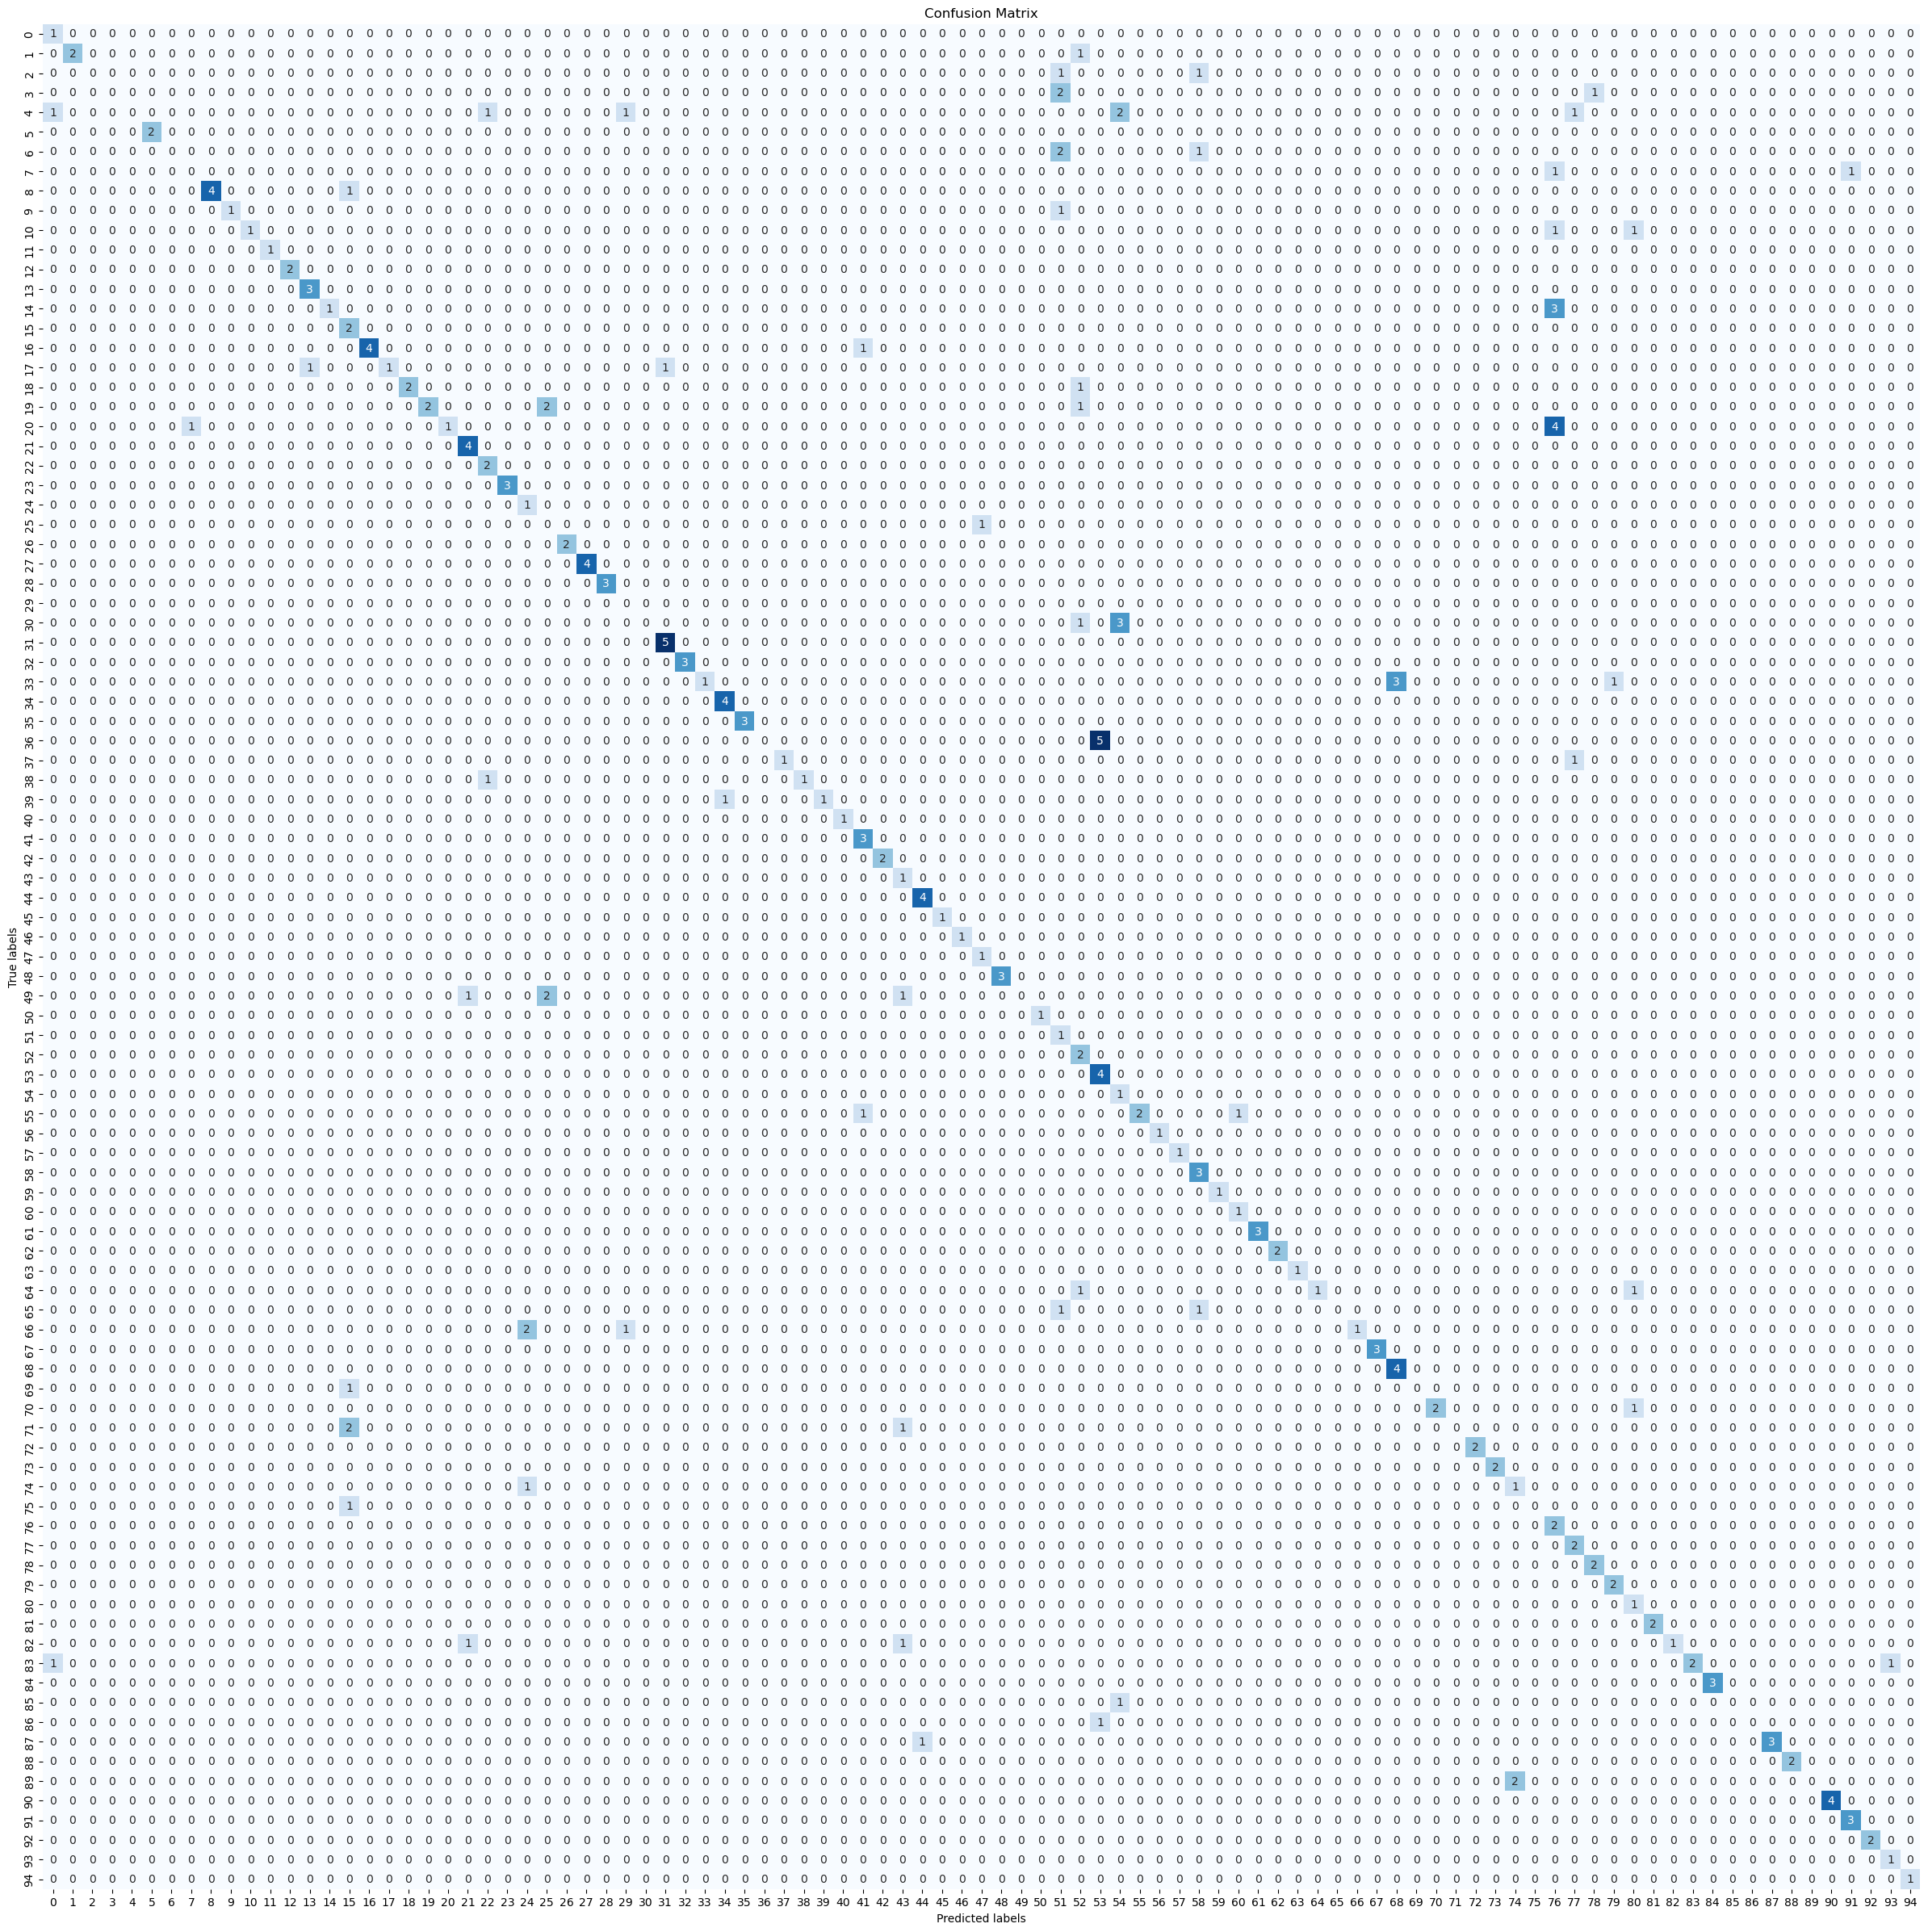

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# model predictions for the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plots for confusion matrix
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

ResNet50 shows a training accuracy of 74% and a test accuracy of 65%, indicates a notable performance gap between training and generalization. This  suggests potential overfitting, as the model fails to effectively generalize to unseen data.

### Conclusion:

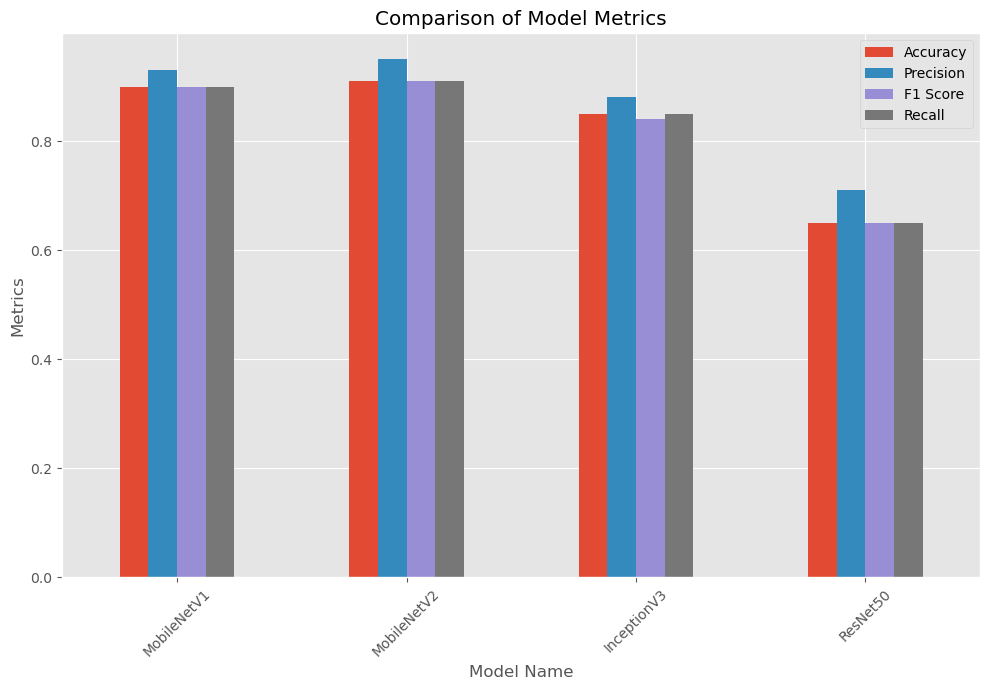

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

#accuracy
data = {
    "Model Name": ["MobileNetV1", "MobileNetV2", "InceptionV3", "ResNet50"],
    "Accuracy": [0.90, 0.91, 0.85, 0.65],
    "Precision": [0.93, 0.95, 0.88, 0.71],
    "F1 Score": [0.90, 0.91, 0.84, 0.65],
    "Recall": [0.90, 0.91, 0.85, 0.65]
}

# DataFrame
df = pd.DataFrame(data)


plt.style.use('ggplot')

# Plotting the data
df.set_index("Model Name").plot(kind='bar', figsize=(10,7))

# Labels and Title
plt.title('Comparison of Model Metrics')
plt.xlabel('Model Name')
plt.ylabel('Metrics')
plt.xticks(rotation=45)
plt.tight_layout()

The bar graph presents a comparison of four different machine learning models — MobileNetV1, MobileNetV2, InceptionV3, and ResNet50 — across four key performance metrics: Accuracy, Precision, F1 Score, and Recall. Here's a detailed summary:

MobileNetV1: This model exhibits high levels of performance across all metrics, with an Accuracy and Recall both at 0.90, and the Precision and F1 Score very close at 0.93 and 0.90, respectively.

MobileNetV2: This model slightly outperforms MobileNetV1, achieving the highest metrics among the four models. It has an Accuracy of 0.91 and a Precision of 0.95, which is the highest Precision value. The F1 Score and Recall both match the Accuracy at 0.91.
InceptionV3: This model shows moderately high performance but lags behind the MobileNet models. It has an Accuracy of 0.85, Precision at 0.88, an F1 Score of 0.84, and a Recall of 0.85.

ResNet50: This model has significantly lower metrics compared to the other three models. All the metrics for ResNet50 — Accuracy, Precision, F1 Score, and Recall — are at 0.65, which is substantially lower than its counterparts.

From the graph, we can infer that MobileNetV2 is the top-performing model in this summary, followed closely by MobileNetV1, with InceptionV3 in the middle range, and ResNet50 falling behind significantly in all measured metrics. This visualization makes it easy to compare the models quickly and to identify which models excel or underperform in certain areas.